In [171]:
import nltk
import jieba
import jieba.posseg as pseg
from nltk.tokenize import word_tokenize 

# 5.1 使用词性标注器

In [4]:
text = nltk.word_tokenize("And now for something completely different")

In [5]:
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [15]:
words = pseg.cut("我爱北京天安门")

In [17]:
for word, flag in words:
    print('%s %s' % (word, flag))

我 r
爱 v
北京 ns
天安门 ns


In [18]:
nltk.help.upenn_tagset('RB')

RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...


In [21]:
"""
有时候句子里面可能会包括一些同形同音异义词
他们拒绝授予我们 垃圾排放许可证  前两个都是动词，后两个是名词
我们需要知道正在使用哪一个词以便能正确读课文。（出于这个原因，文本转
语音系统通常要进行词性标注。）
"""
text = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")

In [22]:
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [23]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [24]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())

In [25]:
text

<Text: the fulton county grand jury said friday an...>

In [26]:
text.similar('woman')

man time day year car moment world house family child country boy
state job place way war girl work word


In [27]:
text.similar('bought')

made said done put had seen found given left heard was been brought
set got that took in told felt


In [28]:
text.similar('over')

in on to of and for with from at by that into as up out down through
is all about


In [29]:
text.similar('the')

a his this their its her an that our any all one these my in your no
some other and


# 5.2 标注语料库

In [31]:
tagged_token = nltk.tag.str2tuple('fly/NN')

In [32]:
tagged_token

('fly', 'NN')

In [33]:
sent = '''
    The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
    other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
    Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
    said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
    accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
    interest/NN of/IN both/ABX governments/NNS ''/'' ./.
'''

In [35]:
[nltk.tag.str2tuple(t) for t in sent.strip().split()]

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('other', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and', 'CC'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it', 'PPS'),
 ('said', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'RB'),
 ('accepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best', 'JJT'),
 ('interest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.')]

In [36]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [37]:
nltk.corpus.nps_chat.tagged_words()

[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]

In [38]:
nltk.corpus.conll2000.tagged_words()

[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ...]

In [39]:
nltk.corpus.treebank.tagged_words()

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

In [40]:
nltk.corpus.brown.tagged_words(simplify_tags=True)

TypeError: tagged_words() got an unexpected keyword argument 'simplify_tags'

In [42]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [44]:
nltk.corpus.sinica_treebank.tagged_words()

[('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]

In [45]:
nltk.corpus.indian.tagged_words()

[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]

In [46]:
from nltk.corpus import brown

brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')

In [47]:
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)

In [52]:
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

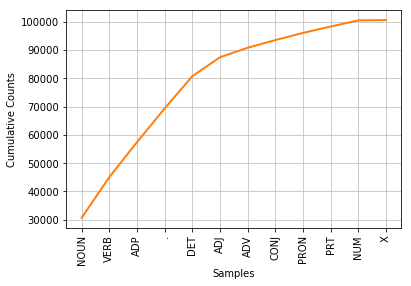

In [51]:
tag_fd.plot(cumulative=True)

In [59]:
nltk.app.concordance()

In [71]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')

In [76]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)

In [77]:
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']

In [78]:
fdist = nltk.FreqDist(noun_preceders)

In [79]:
[tag for (tag, _) in fdist.most_common()]

['NOUN',
 'DET',
 'ADJ',
 'ADP',
 '.',
 'VERB',
 'CONJ',
 'NUM',
 'ADV',
 'PRT',
 'PRON',
 'X']

In [80]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
[wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB']

['is',
 'said',
 'was',
 'are',
 'be',
 'has',
 'have',
 'will',
 'says',
 'would',
 'were',
 'had',
 'been',
 'could',
 "'s",
 'can',
 'do',
 'say',
 'make',
 'may',
 'did',
 'rose',
 'made',
 'does',
 'expected',
 'buy',
 'take',
 'get',
 'might',
 'sell',
 'added',
 'sold',
 'help',
 'including',
 'should',
 'reported',
 'according',
 'pay',
 'compared',
 'being',
 'fell',
 'began',
 'based',
 'used',
 'closed',
 "'re",
 'want',
 'see',
 'took',
 'yield',
 'offered',
 'set',
 'priced',
 'approved',
 'come',
 'noted',
 'cut',
 'ended',
 'found',
 'increased',
 'become',
 'think',
 'named',
 'go',
 'trying',
 'proposed',
 'received',
 'growing',
 'declined',
 'held',
 'give',
 'came',
 'use',
 'put',
 'making',
 'continue',
 'raise',
 'estimated',
 'called',
 'paid',
 'designed',
 'going',
 'expects',
 'seeking',
 'must',
 'plans',
 'wo',
 'increasing',
 'saying',
 'got',
 'owns',
 'trading',
 'acquired',
 'gained',
 'fined',
 'reached',
 'holding',
 'announced',
 'filed',
 'became',


In [81]:
cfd1 = nltk.ConditionalFreqDist(wsj)

In [82]:
cfd1['yield'].most_common()

[('VERB', 28), ('NOUN', 20)]

In [84]:
wsj = nltk.corpus.treebank.tagged_words()

In [85]:
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)

In [87]:
cfd2

ConditionalFreqDist(nltk.probability.FreqDist,
                    {'#': FreqDist({'#': 16}),
                     '$': FreqDist({'$': 718, 'C$': 2, 'US$': 4}),
                     "''": FreqDist({"'": 10, "''": 684}),
                     ',': FreqDist({',': 4885, 'Wa': 1}),
                     '-LRB-': FreqDist({'-LCB-': 14, '-LRB-': 106}),
                     '-NONE-': FreqDist({'*': 965,
                               '*-1': 1123,
                               '*-10': 2,
                               '*-100': 1,
                               '*-101': 1,
                               '*-102': 2,
                               '*-103': 1,
                               '*-104': 1,
                               '*-105': 1,
                               '*-106': 1,
                               '*-107': 1,
                               '*-108': 1,
                               '*-109': 1,
                               '*-11': 2,
                               '*-110': 1,
 

In [86]:
list(cfd2['VBN'])

['named',
 'used',
 'caused',
 'exposed',
 'reported',
 'replaced',
 'sold',
 'died',
 'expected',
 'diagnosed',
 'studied',
 'industrialized',
 'owned',
 'found',
 'classified',
 'rejected',
 'outlawed',
 'imported',
 'tracked',
 'thought',
 'considered',
 'elected',
 'based',
 'lifted',
 'ensnarled',
 'voted',
 'been',
 'held',
 'banned',
 'renovated',
 'prolonged',
 'recorded',
 'accumulated',
 'offered',
 'become',
 'guaranteed',
 'proposed',
 'related',
 'improved',
 'worried',
 'cluttered',
 'expedited',
 'retired',
 'ordered',
 'collected',
 'required',
 'received',
 'moved',
 'determined',
 'made',
 'changed',
 'completed',
 'disputed',
 'refunded',
 'estimated',
 'compared',
 'located',
 'filed',
 'scrapped',
 'anticipated',
 'priced',
 'set',
 'applied',
 'existed',
 'incurred',
 'reached',
 'Regarded',
 'paid',
 'trained',
 'instituted',
 'vowed',
 'deemed',
 'combined',
 'removed',
 'concerned',
 'complained',
 'accelerated',
 'believed',
 'called',
 'solved',
 'forgiven',


In [93]:
cfd1 = nltk.ConditionalFreqDist(wsj)

In [94]:
[w for w in cfd1.conditions() if 'VBD' in cfd1[w] and 'VBN' in cfd1[w]]

['named',
 'used',
 'caused',
 'reported',
 'said',
 'stopped',
 'heard',
 'studied',
 'led',
 'replaced',
 'sold',
 'worked',
 'died',
 'found',
 'rejected',
 'imposed',
 'made',
 'dumped',
 'imported',
 'mixed',
 'described',
 'continued',
 'ended',
 'thought',
 'reached',
 'had',
 'approved',
 'completed',
 'suspended',
 'lifted',
 'dropped',
 'voted',
 'settled',
 'decided',
 'followed',
 'welcomed',
 'held',
 'banned',
 'pointed',
 'squeezed',
 'fed',
 'registered',
 'released',
 'increased',
 'forecast',
 'recorded',
 'announced',
 'offered',
 'lowered',
 'spent',
 'proposed',
 'got',
 'added',
 'noted',
 'turned',
 'closed',
 'retired',
 'ordered',
 'required',
 'received',
 'moved',
 'determined',
 'changed',
 'upheld',
 'set',
 'estimated',
 'compared',
 'opened',
 'tied',
 'filed',
 'disclosed',
 'anticipated',
 'attached',
 'called',
 'applied',
 'favored',
 'posted',
 'paid',
 'removed',
 'accelerated',
 'placed',
 'vowed',
 'deemed',
 'prompted',
 'complained',
 'believed'

In [95]:
idx1 = wsj.index(('kicked', 'VBD'))

In [96]:
wsj[idx1-4:idx1+1]

[('While', 'IN'),
 ('program', 'NN'),
 ('trades', 'NNS'),
 ('swiftly', 'RB'),
 ('kicked', 'VBD')]

In [97]:
idx2 = wsj.index(('kicked', 'VBN'))

In [98]:
wsj[idx2-4:idx2+1]

[('head', 'NN'),
 ('of', 'IN'),
 ('state', 'NN'),
 ('has', 'VBZ'),
 ('kicked', 'VBN')]

In [99]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

In [100]:
tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))

In [102]:
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

In [104]:
brown_learned_text = brown.words(categories='learned')

In [105]:
sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often'))

[',',
 '.',
 'accomplished',
 'analytically',
 'appear',
 'apt',
 'associated',
 'assuming',
 'became',
 'become',
 'been',
 'began',
 'call',
 'called',
 'carefully',
 'chose',
 'classified',
 'colorful',
 'composed',
 'contain',
 'differed',
 'difficult',
 'encountered',
 'enough',
 'equate',
 'extremely',
 'found',
 'happens',
 'have',
 'ignored',
 'in',
 'involved',
 'more',
 'needed',
 'nightly',
 'observed',
 'of',
 'on',
 'out',
 'quite',
 'represent',
 'responsible',
 'revamped',
 'seclude',
 'set',
 'shortened',
 'sing',
 'sounded',
 'stated',
 'still',
 'sung',
 'supported',
 'than',
 'to',
 'when',
 'work']

In [106]:
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')

In [108]:
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']

In [109]:
fd = nltk.FreqDist(tags)

In [110]:
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [111]:
# 搜索 动词词组 verb to verb
def process(sentence):
    for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print(w1, w2, w3)

In [112]:
for tagged_sent in brown.tagged_sents():
    process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
designed to provide
get to hear
expects to tell
expected to give
prefer to pay
required to obtain
permitted to teach
designed to reduce
Asked to elaborate
got to go
raised to pay
scheduled to go
cut to meet
needed to meet
hastened to add
found to prevent
continue to insist
compelled to make
made to remove
revamped to give
want to risk
appear to spark
fails to consider
plans to call
going to examine
plans to name
come to pass
voted to accept
happens to hold
authorized to adopt
hesitated to prosecute
try to make
decided to spend
taken to preserve
left to preserve
stand to bring
decided to seek
trying to induce
proposing to make
decided to run
directed to investigate
expected to pass
expected to make
expected to encounter
hopes to pass
came to pay
expected to receive
understood to follow
wanted to vote
decide

tended to stifle
begin to understand
fail to achieve
made to keep
desiring to unite
invited to speak
hesitate to ask
trying to make
help to determine
combine to provide
attempt to compensate
learn to recognize
serve to promote
claim to incarnate
led to emphasize
tend to consider
expected to seek
disposed to compromise
served to provide
mean to imply
mean to imply
attempts to face
need to submit
prepared to run
asked to choose
continuing to incur
seems to think
begin to amass
sought to limit
bring to bear
invited to participate
sought to bring
attempting to explore
seen to consist
committed to avoid
claim to serve
determined to avoid
trying to converse
started to adjust
trying to make
decided to take
forced to conclude
beginning to make
helped to make
made to give
determined to exclude
sought to win
sought to avoid
meant to incur
supposed to result
cited to show
supposed to possess
burned to make
wanted to find
helps to meet
rejoiced to see
began to suspect
began to review
called to sit

wished to continue
failed to flourish
propose to go
wished to segregate
liked to fancy
Deciding to become
strove to see
used to play
returned to live
proceeded to find
likes to catch
seems to care
intends to save
compelled to find
wishes to continue
ceasing to write
stops to ask
expected to fulfill
tailored to meet
want to say
want to quote
seems to realize
primed to catch
try to diagnose
want to point
used to regard
seems to represent
trying to draw
wish to see
used to include
allowed to operate
urged to produce
afford to present
decides to drop
expect to abolish
needed to pit
tempted to blame
hope to serve
tried to remedy
tends to express
seem to believe
permitted to return
attempted to make
prepared to demonstrate
calculated to suggest
seemed to disconcert
known to make
going to talk
learns to focus
chooses to subordinate
wish to preserve
cease to exist
seem to constitute
destined to fail
wants to get
began to understand
wanted to capture
liked to tell
decided to migrate
continued t

working to become
led to see
asked to vote
duplicated to form
learn to play
want to change
learns to become
began to emerge
used to annoy
stooping to dispense
come to see
preferred to keep
used to give
came to feel
used to accomplish
found to match
required to store
saved to represent
saved to represent
created to accommodate
inspected to determine
used to look
serve to illustrate
intended to decrease
required to improve
italicized to guide
seems to center
operate to center
serves to focus
purport to represent
hesitates to suggest
mentioned to make
trying to develop
compelled to omit
continue to show
planning to use
expecting to recover
meant to move
preferred to continue
trying to find
planned to exterminate
trying to marry
pledged to hold
determined to create
seemed to assure
attempted to marry
obliged to concede
expected to democratize
Failing to heed
determined to keep
tend to procrastinate
even to repudiate
served to minimize
encouraged to state
trying to unearth
decided to remove

Failing to find
Try to forget
seen to leave
forced to give
inclined to admit
began to make
professed to know
asked to use
leaving to keep
fit to consult
asked to see
wanted to make
continued to discharge
seem to belong
began to flicker
trying to wreck
fit to touch
going to take
trying to clear
want to spend
paused to look
going to allow
like to talk
planning to set
bent to examine
turned to jump
started to retch
going to get
come to recognize
expected to report
failed to see
failed to notify
failed to co-operate
stopping to hear
want to talk
going to cost
wanted to ask
going to get
going to swear
tried to keep
think to look
tried to find
bear to hold
began to pace
tried to tell
intended to scare
began to think
hired to take
going to send
helped to create
wanted to give
led to believe
trying to escape
began to thrash
get to work
come to work
want to see
wanted to get
want to go
managed to swallow
threatened to fire
happen to see
going to eat
began to weep
happens to ask
want to rent
Try

In [114]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag) for (word, tag) in brown_news_tagged)

for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        tags = [tag for (tag, _) in data[word].most_common()]
        print(word, ' '.join(tags))

best ADJ ADV VERB NOUN
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


# 5.3 使用Python字典映射词及其属性

## 2 Python 字典

In [115]:
pos = {}
pos['colorless'] = 'ADJ'
pos['ideas'] = 'N'
pos['sleep'] = 'V'
pos['furiously'] = 'ADV'

In [116]:
pos

{'colorless': 'ADJ', 'furiously': 'ADV', 'ideas': 'N', 'sleep': 'V'}

In [117]:
list(pos)

['colorless', 'ideas', 'sleep', 'furiously']

In [118]:
sorted(pos)

['colorless', 'furiously', 'ideas', 'sleep']

In [119]:
[w for w in pos if w.endswith('s')]

['colorless', 'ideas']

In [120]:
for word in sorted(pos):
    print(word + ":", pos[word])

colorless: ADJ
furiously: ADV
ideas: N
sleep: V


In [122]:
list(pos.keys())

['colorless', 'ideas', 'sleep', 'furiously']

In [123]:
list(pos.values())

['ADJ', 'N', 'V', 'ADV']

In [124]:
list(pos.items())

[('colorless', 'ADJ'), ('ideas', 'N'), ('sleep', 'V'), ('furiously', 'ADV')]

In [125]:
for key, val in sorted(pos.items()):
    print(key + ":", val)

colorless: ADJ
furiously: ADV
ideas: N
sleep: V


## 3 定义字典

In [126]:
pos = dict(colorless='ADJ', ideas='N', sleep='V', furiously='ADV')

## 4 默认字典

In [127]:
from collections import defaultdict

In [128]:
frequency = defaultdict(int)
frequency['colorless'] = 4

In [130]:
frequency['ideas']

0

In [131]:
pos = nltk.defaultdict(list)
pos['sleep'] = ['NOUN', 'VERB']

In [132]:
pos['ideas']

[]

In [133]:
pos = defaultdict(lambda: 'NOUN')

In [134]:
pos['colorless'] = 'ADJ'

In [135]:
pos['blog']

'NOUN'

In [136]:
list(pos.items())

[('colorless', 'ADJ'), ('blog', 'NOUN')]

In [137]:
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')

In [140]:
vocab = nltk.FreqDist(alice)

In [146]:
v1000 = [word for (word, _) in vocab.most_common(1000)]

In [147]:
mapping = defaultdict(lambda: 'UNK')

In [148]:
for v in v1000:
    mapping[v] = v

In [149]:
alice2 = [mapping[v] for v in alice]

In [151]:
alice2[:10]

['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'UNK', 'UNK']

##  5 递增地更新字典

In [152]:
counts = defaultdict(int)

In [153]:
for (word, tag) in nltk.corpus.brown.tagged_words(categories='news', tagset='universal'):
    counts[tag] += 1

In [154]:
counts['NOUN']

30654

In [155]:
sorted(counts)

['.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X']

In [156]:
from operator import itemgetter

In [157]:
sorted(counts.items(), key=itemgetter(1), reverse=True)

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

In [158]:
last_letters = defaultdict(list)

In [159]:
words = nltk.corpus.words.words('en')
for word in words:
    key = word[-2:]
    last_letters[key].append(word)

In [161]:
last_letters['ly']

['abactinally',
 'abandonedly',
 'abasedly',
 'abashedly',
 'abashlessly',
 'abbreviately',
 'abdominally',
 'abhorrently',
 'abidingly',
 'abiogenetically',
 'abiologically',
 'abjectly',
 'ableptically',
 'ably',
 'abnormally',
 'abominably',
 'aborally',
 'aboriginally',
 'abortively',
 'aboundingly',
 'abridgedly',
 'abruptedly',
 'abruptly',
 'abscondedly',
 'absently',
 'absentmindedly',
 'absolutely',
 'absolutistically',
 'absorbedly',
 'absorbingly',
 'absorptively',
 'abstemiously',
 'abstinently',
 'abstractedly',
 'abstractively',
 'abstractly',
 'abstrusely',
 'absurdly',
 'abundantly',
 'abusedly',
 'abusefully',
 'abusively',
 'abysmally',
 'academically',
 'acceleratedly',
 'accentually',
 'acceptably',
 'acceptedly',
 'accessarily',
 'accessibly',
 'accessively',
 'accessorily',
 'accidentally',
 'accidently',
 'accommodately',
 'accommodatingly',
 'accordantly',
 'accordingly',
 'accountably',
 'accumulatively',
 'accurately',
 'accursedly',
 'accusably',
 'accusative

In [163]:
anagrams = nltk.defaultdict(list)
for word in words:
    key = ''.join(sorted(word))
    anagrams[key].append(word)

In [164]:
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

In [165]:
anagrams = nltk.Index((''.join(sorted(w)), w) for w in words)

In [166]:
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

## 6 复杂的键和值

In [167]:
pos = defaultdict(lambda: defaultdict(int))

brown_news_tagged = nltk.corpus.brown.tagged_words(categories='news', tagset='universal')

for ((w1, t1), (w2, t2)) in nltk.bigrams(brown_news_tagged):
    pos[(t1, w2)][t2] += 1

In [168]:
pos[('DET', 'right')]

defaultdict(int, {'ADJ': 11, 'NOUN': 5})

## 7 颠倒字典

# 5.4 自动标注

In [169]:
from nltk.corpus import brown

brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

## 1 默认标注器

> 默认的标注器给每一个单独的词分配标记，即使是之前从未遇到过的词。碰巧的是，一旦我们处理了几千词的英文文本之后，大多数新词都将是名词。正如我们将看到的，这意味着，默认标注器可以帮助我们提高语言处理系统的稳定性。我们将很快回来讲述这个。

In [170]:
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

'NN'

In [172]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'

In [173]:
tokens = word_tokenize(raw)

In [174]:
# 把所有词都标成一个词性，就是出现最多次的那个词性
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [175]:
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

## 2 正则表达式标注器

In [176]:
 patterns = [
...     (r'.*ing$', 'VBG'),               # gerunds
...     (r'.*ed$', 'VBD'),                # simple past
...     (r'.*es$', 'VBZ'),                # 3rd singular present
...     (r'.*ould$', 'MD'),               # modals
...     (r'.*\'s$', 'NN$'),               # possessive nouns
...     (r'.*s$', 'NNS'),                 # plural nouns
...     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
...     (r'.*', 'NN')                     # nouns (default)
... ]

In [178]:
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [179]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20326391789486245

## 3 查询标注器

> 选择了出现次数最多的词语及其对应的词性作为 词性标注器的初始化，但是有很多词并没有出现，所有性能并没有很高。

In [181]:
fd = nltk.FreqDist(brown.words(categories='news'))

In [182]:
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))

In [184]:
most_freq_words = fd.most_common(100)

In [186]:
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)

In [188]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags)

In [189]:
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

In [190]:
sent = brown.sents(categories='news')[3]

In [192]:
baseline_tagger.tag(sent)

[('``', '``'),
 ('Only', None),
 ('a', 'AT'),
 ('relative', None),
 ('handful', None),
 ('of', 'IN'),
 ('such', None),
 ('reports', None),
 ('was', 'BEDZ'),
 ('received', None),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', None),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', None),
 ('the', 'AT'),
 ('widespread', None),
 ('interest', None),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', None),
 (',', ','),
 ('the', 'AT'),
 ('number', None),
 ('of', 'IN'),
 ('voters', None),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', None),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', None),
 ("''", "''"),
 ('.', '.')]

In [193]:
# 如果要标注的词不在词表里，就用默认标注器 标成NN--回退
baseline_tagger = nltk.UnigramTagger(model=likely_tags, backoff=nltk.DefaultTagger('NN'))

In [194]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

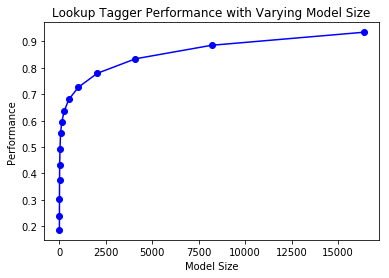

In [195]:
display()

# 5.5 N-gram标注

## 1 一元标注

In [197]:
from nltk.corpus import brown 

brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

In [200]:
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)

In [201]:
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [202]:
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

## 2 分离训练和测试数据

In [210]:
# 降低训练集的比例，性能会下降
size = int(len(brown_tagged_sents) * 0.9)
print(size)

4160


In [211]:
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8121200039868434

## 3 一般的N-gram的标注

In [212]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [214]:
unseen_sent = brown_sents[4203]

In [215]:
bigram_tagger.tag(unseen_sent)

[('The', 'AT'),
 ('population', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('Congo', 'NP'),
 ('is', 'BEZ'),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

In [213]:
bigram_tagger.evaluate(test_sents)

0.10206319146815508

In [220]:
bigram_tagger_cut = nltk.BigramTagger(train_sents, cutoff=2)
bigram_tagger_cut.evaluate(test_sents)

0.062095086215488884

In [216]:
trigram_tagger = nltk.TrigramTagger(train_sents)
trigram_tagger.evaluate(test_sents)

0.0626931127279976

## 4 组合标注器

In [217]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t3 = nltk.TrigramTagger(train_sents, backoff=t2)

In [221]:
t2.evaluate(test_sents)

0.8452108043456593

## 5 标注生词

> 一个有用的基于上下文标注生词的方法是限制一个标注器的词汇表为最频繁的n 个词，使用5.3 节中的方法替代每个其他的词为一个特殊的词UNK。训练时，一个unigram 标注器可能会学到UNK 通常是一个名词。然而，n-gram 标注器会检测它的一些其他标记中的上下文。例如：如果前面的词是to（标注为TO），那么UNK 可能会被标注为一个动词。

## 6 存储标注器

In [223]:
import pickle

## 7 性能限制（略）

In [229]:
cfd = nltk.ConditionalFreqDist(((x[1], y[1], z[0]), z[1]) for sent in brown_tagged_sents for x, y, z in nltk.trigrams(sent))
ambiguous_contexts = [c for c in cfd.conditions() if len(cfd[c]) > 1]

In [230]:
sum(cfd[c].N() for c in ambiguous_contexts) / cfd.N()

0.049297702068029296

## 8 跨句子边界标注（同4）

# 5.6 基于转换的标注

In [236]:
from nltk.tbl.template import Template
from nltk.tag.brill import Pos, Word
from nltk.tag import untag, RegexpTagger, BrillTaggerTrainer
from nltk.corpus import treebank

In [237]:
training_data = treebank.tagged_sents()[:100]
baseline_data = treebank.tagged_sents()[100:200]
gold_data = treebank.tagged_sents()[200:300]
testing_data = [untag(s) for s in gold_data]

In [238]:
patterns = [
...     (r'.*ing$', 'VBG'),               # gerunds
...     (r'.*ed$', 'VBD'),                # simple past
...     (r'.*es$', 'VBZ'),                # 3rd singular present
...     (r'.*ould$', 'MD'),               # modals
...     (r'.*\'s$', 'NN$'),               # possessive nouns
...     (r'.*s$', 'NNS'),                 # plural nouns
...     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
...     (r'.*', 'NN')                     # nouns (default)
... ]

In [239]:
backoff = RegexpTagger(patterns)

In [240]:
baseline = backoff
baseline.evaluate(gold_data)

0.2205942205942206

In [241]:
Template._cleartemplates()

In [242]:
templates = [Template(Pos([-1])), Template(Pos([-1]), Word([0]))]

In [243]:
tt = BrillTaggerTrainer(baseline, templates, trace=3)

In [244]:
tagger1 = tt.train(training_data, max_rules=10)

TBL train (fast) (seqs: 100; tokens: 2417; tpls: 2; min score: 2; min acc: None)
Finding initial useful rules...
    Found 876 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  93  93   0   0  | NN->DT if Pos:NN@[-1] & Word:the@[0]
  88  88   0   0  | NN->, if Pos:NN@[-1] & Word:,@[0]
  69  69   0   0  | NN->. if Pos:NN@[-1] & Word:.@[0]
  51  51   0   0  | NN->IN if Pos:NN@[-1] & Word:of@[0]
  38  38   0   0  | NN->TO if Pos:NN@[-1] & Word:to@[0]
  34  46  12 130  | NN->IN if Pos:NNS@[-1]
  30  33   3   1  | VBZ->NNS if Pos:NN@[-1]
  27  27   0   0  | NN->DT if Pos:NN@[-1] & Word:a@[0]
  22  27   5  39  | NN->-NONE- if Pos:VBD@[-1]
  

In [246]:
tagger1.evaluate(gold_data)

0.39845339845339844

In [249]:
# 改变 max_rules 可以提高词性标注的性能
tagger2 = tt.train(training_data, max_rules=100, min_acc=0.99)

TBL train (fast) (seqs: 100; tokens: 2417; tpls: 2; min score: 2; min acc: 0.99)
Finding initial useful rules...
    Found 876 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  93  93   0   0  | NN->DT if Pos:NN@[-1] & Word:the@[0]
  88  88   0   0  | NN->, if Pos:NN@[-1] & Word:,@[0]
  69  69   0   0  | NN->. if Pos:NN@[-1] & Word:.@[0]
  51  51   0   0  | NN->IN if Pos:NN@[-1] & Word:of@[0]
  38  38   0   0  | NN->TO if Pos:NN@[-1] & Word:to@[0]
  30  30   0   0  | NN->DT if Pos:NN@[-1] & Word:a@[0]
  19  19   0  10  | NN->VB if Pos:TO@[-1]
  19  19   0   0  | NN->. if Pos:NNS@[-1] & Word:.@[0]
  19  19   0   0  | NN->CC if Pos:NN@[-

In [250]:
tagger2.evaluate(gold_data)

0.5616605616605617